In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import random
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
y = []
data_path=r'C:\Users\Rohit Varre\Desktop\Project Spidy'
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'stress':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = pd.read_csv(temp_path)
            temp = temp.iloc[7:1507]
            temp.drop('% Model', axis = 1,inplace= True)
            temp.columns = ['']
            y.append(temp.to_numpy())

In [3]:
X = pd.read_csv(temp_path)
X = X.iloc[7:1507]
X.drop('Untitled.mph',axis = 1, inplace = True)
X = np.array(X)
X = X.reshape(1,1500)
X = X.astype(np.float)
print(X.shape)
print(X)

(1, 1500)
[[0.         0.00123188 0.00246376 ... 0.99907609 0.99938406 0.99969203]]


In [4]:
x = np.empty((1,1500))
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'Curve Coordinates':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = np.load(temp_path)
            temp.reshape(1500,-1)
            x = np.append(x,temp,axis = 0)
x = x[1:]

In [5]:
N = x.shape[0]
x = np.array(x)
y = np.array(y)
x = x.astype(np.float)
y = y.astype(np.float)
y = y.reshape(-1,1500)
print(x.shape,y.shape)

(7856, 1500) (7856, 1500)


In [6]:
x_1 = x[:,:1250]
y_1 = y[:,:1250]
x_2 = x[:,1250:]
y_2 = y[:,1250:]

In [7]:
scaler = RobustScaler()
y_1 = scaler.fit_transform(y_1)
print(y_1.max(),y_1.min())

58.36777768718635 -0.5259410148257148


In [8]:
y_2 = np.log(y_2)
print(y_2.max(),y_2.min())

17.575202730683 11.0549566351799


In [9]:
from sklearn.model_selection import train_test_split
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1,y_1,test_size = 0.2)
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2,y_2,test_size = 0.2)

In [10]:
print(x_1_train.shape)
print(y_1_train.shape)
print(x_1_test.shape)
print(y_1_test.shape)
print(x_2_train.shape)
print(y_2_train.shape)
print(x_2_test.shape)
print(y_2_test.shape)

(6284, 1250)
(6284, 1250)
(1572, 1250)
(1572, 1250)
(6284, 250)
(6284, 250)
(1572, 250)
(1572, 250)


In [11]:
model = Sequential([
    
    Dense(units = 1250, input_shape = (1250,), activation = 'tanh'),
    Dropout(0.2),
    Dense(units = 1500, activation = 'tanh',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(units = 2000, activation = 'tanh',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dense(units = 2000, activation = 'tanh',kernel_regularizer = keras.regularizers.l2(0.05)),
    Dense(units = 2500, activation = 'tanh'),
    Dropout(0.2),
    Dense(units = 1500, activation = 'tanh'),
    Dense(units = 1500, activation = 'tanh'),
    Dense(units = 1250)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1250)              1563750   
_________________________________________________________________
batch_normalization (BatchNo (None, 1250)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 1250)              1563750   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1250)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 2500)              3127500   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2500)              10000     
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              1

In [12]:
model_1.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9), loss='mean_squared_error', metrics = ['RootMeanSquaredError'])
history = model_1.fit(x=x_1_train,y=y_1_train,epochs=20,verbose=2,validation_split=0.2,batch_size=128)

Epoch 1/20
40/40 - 17s - loss: 202.4939 - root_mean_squared_error: 2.3411 - val_loss: 79.6876 - val_root_mean_squared_error: 2.0980
Epoch 2/20
40/40 - 16s - loss: 38.6961 - root_mean_squared_error: 2.2888 - val_loss: 13.8150 - val_root_mean_squared_error: 2.0527
Epoch 3/20
40/40 - 21s - loss: 9.3210 - root_mean_squared_error: 2.2527 - val_loss: 5.4790 - val_root_mean_squared_error: 2.0507
Epoch 4/20
40/40 - 27s - loss: 5.7187 - root_mean_squared_error: 2.2349 - val_loss: 5.0300 - val_root_mean_squared_error: 2.1506
Epoch 5/20
40/40 - 26s - loss: 5.1878 - root_mean_squared_error: 2.2277 - val_loss: 4.1182 - val_root_mean_squared_error: 1.9924
Epoch 6/20
40/40 - 33s - loss: 5.1060 - root_mean_squared_error: 2.2299 - val_loss: 4.0533 - val_root_mean_squared_error: 1.9932
Epoch 7/20
40/40 - 38s - loss: 4.9739 - root_mean_squared_error: 2.2196 - val_loss: 3.9893 - val_root_mean_squared_error: 1.9899
Epoch 8/20
40/40 - 32s - loss: 4.9401 - root_mean_squared_error: 2.2180 - val_loss: 3.9849 -

In [13]:
model_1.evaluate(x=x_1_test,y=y_1_test)
y_pred_1 = model_1.predict(x_1_test)

50/50 [==============================] - 5s 103ms/step - loss: 4.9627 - root_mean_squared_error: 2.2217


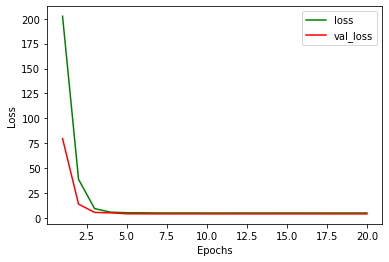

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y1_test_actuall = scaler.inverse_transform(y_1_test)
y_1_predd = scaler.inverse_transform(y_pred_1)
y_pred_1 = y_1_predd.reshape(-1,1250)
y1_test_actual = y1_test_actuall.reshape(-1,1250)
print(y1_test_actual.shape)

(1572, 1250)


In [16]:
x1 = X[:,:1250].reshape(1250,)
print(x1.shape)

(1250,)


[483, 621, 211, 1477, 811, 980, 317, 184, 136, 40, 822, 1125, 592, 1567, 120]


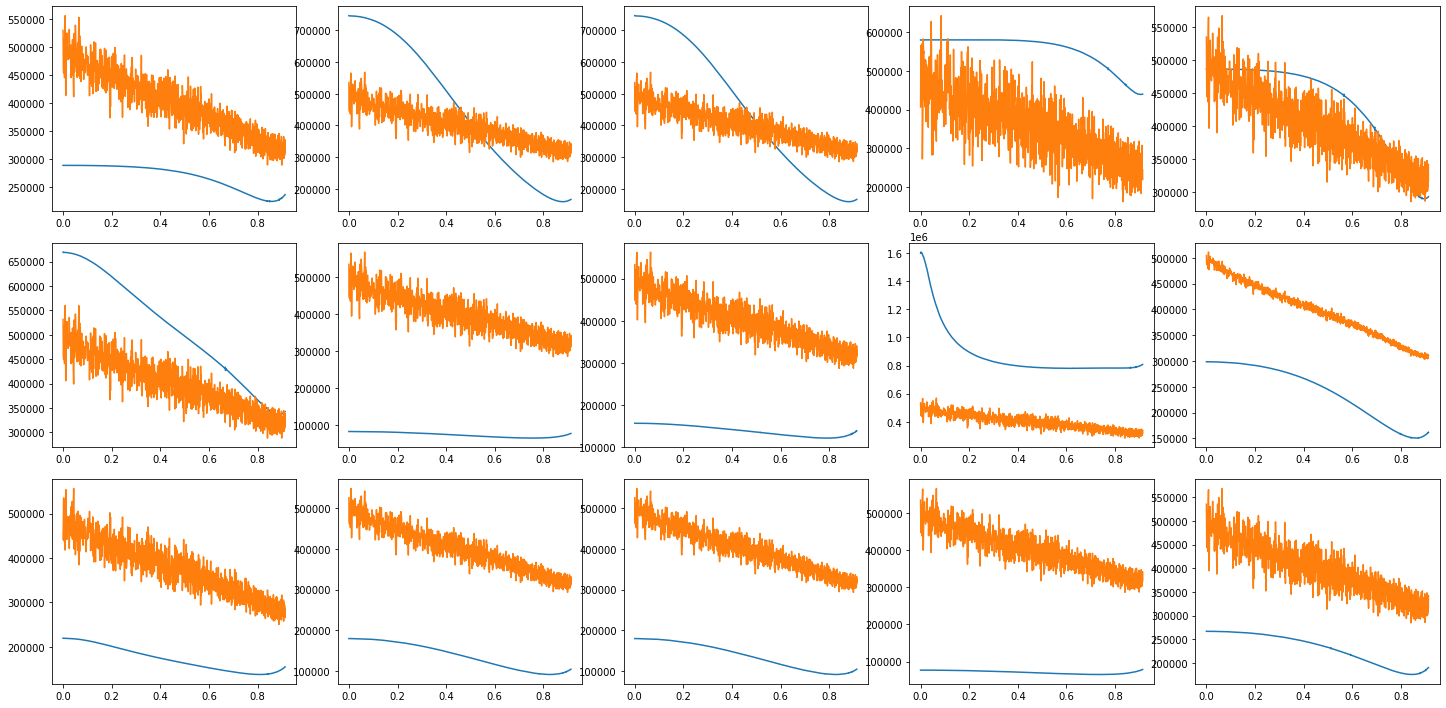

In [17]:
import random
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))
plt.tight_layout()

random.seed(4)
n = random.sample(range(0, y1_test_actual.shape[0]), 15)

print(n)

ax[0,0].plot(x1, y1_test_actual[n[0]])
ax[0,0].plot(x1, y_pred_1[n[0]])
ax[0,1].plot(x1, y1_test_actual[n[1]])
ax[0,1].plot(x1, y_pred_1[n[1]])
ax[0,2].plot(x1, y1_test_actual[n[1]])
ax[0,2].plot(x1, y_pred_1[n[1]])
ax[0,3].plot(x1, y1_test_actual[n[3]])
ax[0,3].plot(x1, y_pred_1[n[3]])
ax[0,4].plot(x1, y1_test_actual[n[4]])
ax[0,4].plot(x1, y_pred_1[n[4]])
ax[1,0].plot(x1, y1_test_actual[n[5]])
ax[1,0].plot(x1, y_pred_1[n[5]])
ax[1,1].plot(x1, y1_test_actual[n[6]])
ax[1,1].plot(x1, y_pred_1[n[6]])
ax[1,2].plot(x1, y1_test_actual[n[7]])
ax[1,2].plot(x1, y_pred_1[n[7]])
ax[1,3].plot(x1, y1_test_actual[n[8]])
ax[1,3].plot(x1, y_pred_1[n[8]])
ax[1,4].plot(x1, y1_test_actual[n[9]])
ax[1,4].plot(x1, y_pred_1[n[9]])
ax[2,0].plot(x1, y1_test_actual[n[10]])
ax[2,0].plot(x1, y_pred_1[n[10]])
ax[2,1].plot(x1, y1_test_actual[n[11]])
ax[2,1].plot(x1, y_pred_1[n[11]])
ax[2,2].plot(x1, y1_test_actual[n[11]])
ax[2,2].plot(x1, y_pred_1[n[11]])
ax[2,3].plot(x1, y1_test_actual[n[13]])
ax[2,3].plot(x1, y_pred_1[n[13]])
ax[2,4].plot(x1, y1_test_actual[n[14]])
ax[2,4].plot(x1, y_pred_1[n[14]])

In [18]:
model_2 = Sequential([

    Dense(units = 250, input_shape = (250,), activation = 'tanh'),
    BatchNormalization(),
    Dense(units = 500, activation = 'tanh',kernel_regularizer = keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(units = 500, activation = 'tanh',kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 750, activation = 'tanh'),
    Dense(units = 500, activation = 'tanh'),
    Dense(units = 250, activation = 'tanh'),
    Dense(units = 250)
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 250)               62750     
_________________________________________________________________
batch_normalization_3 (Batch (None, 250)               1000      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               125500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 750)               375750    
_________________________________________________________________
dense_12 (Dense)             (None, 500)              

In [19]:
model_2.compile(optimizer=SGD(learning_rate=0.02,momentum=0.9), loss='mean_squared_error', metrics = ['RootMeanSquaredError'])
history = model_2.fit(x=x_2_train,y=y_2_train,epochs=30,verbose=2,validation_split=0.2,batch_size=128)

Epoch 1/30
40/40 - 3s - loss: 77.3291 - root_mean_squared_error: 8.1043 - val_loss: 86.2970 - val_root_mean_squared_error: 8.2940
Epoch 2/30
40/40 - 1s - loss: 16.8858 - root_mean_squared_error: 0.7416 - val_loss: 55.5643 - val_root_mean_squared_error: 6.4381
Epoch 3/30
40/40 - 1s - loss: 12.6425 - root_mean_squared_error: 0.7295 - val_loss: 28.0056 - val_root_mean_squared_error: 4.2267
Epoch 4/30
40/40 - 2s - loss: 9.2144 - root_mean_squared_error: 0.7277 - val_loss: 8.3509 - val_root_mean_squared_error: 1.0409
Epoch 5/30
40/40 - 2s - loss: 6.7546 - root_mean_squared_error: 0.7284 - val_loss: 5.7431 - val_root_mean_squared_error: 0.7315
Epoch 6/30
40/40 - 2s - loss: 4.9901 - root_mean_squared_error: 0.7278 - val_loss: 4.2568 - val_root_mean_squared_error: 0.7242
Epoch 7/30
40/40 - 2s - loss: 3.7282 - root_mean_squared_error: 0.7291 - val_loss: 3.2004 - val_root_mean_squared_error: 0.7250
Epoch 8/30
40/40 - 2s - loss: 2.8197 - root_mean_squared_error: 0.7272 - val_loss: 2.4409 - val_ro

In [20]:
model_2.evaluate(x=x_2_test,y=y_2_test)
y_pred_2 = model_2.predict(x_2_test)

50/50 [==============================] - 1s 8ms/step - loss: 0.5090 - root_mean_squared_error: 0.7126


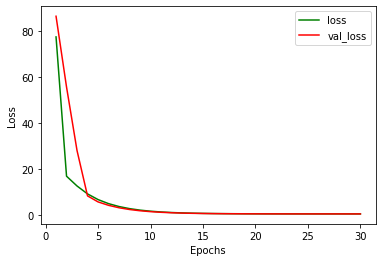

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
y2_test_actual = np.exp(y_2_test)
y_pred_2 = np.exp(y_pred_2)

In [23]:
x2 = X[:,1250:].reshape(250,)

[483, 621, 211, 1477, 811, 980, 317, 184, 136, 40, 822, 1125, 592, 1567, 120]


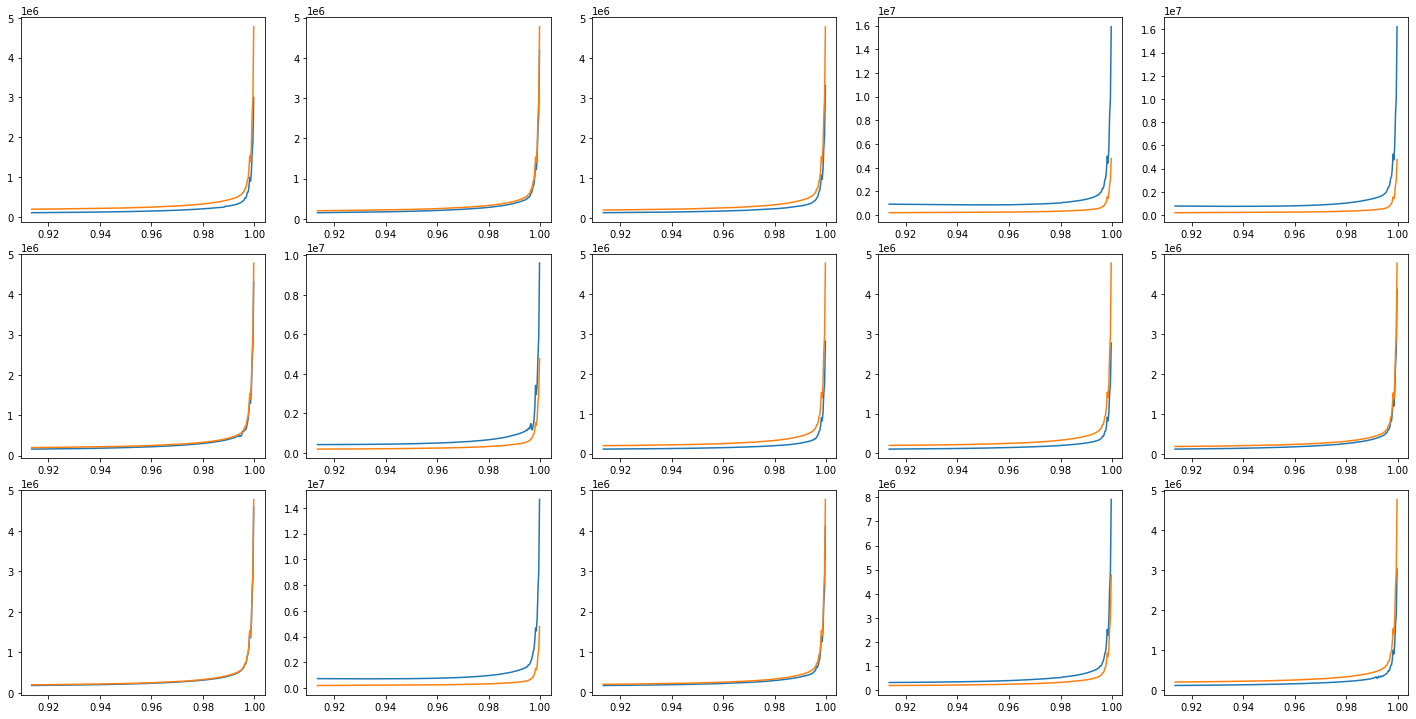

In [24]:
import random
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))
plt.tight_layout()

random.seed(4)
n = random.sample(range(0, y2_test_actual.shape[0]), 15)

print(n)

ax[0,0].plot(x2, y2_test_actual[n[0]])
ax[0,0].plot(x2, y_pred_2[n[0]])
ax[0,1].plot(x2, y2_test_actual[n[1]])
ax[0,1].plot(x2, y_pred_2[n[1]])
ax[0,2].plot(x2, y2_test_actual[n[2]])
ax[0,2].plot(x2, y_pred_2[n[2]])
ax[0,3].plot(x2, y2_test_actual[n[3]])
ax[0,3].plot(x2, y_pred_2[n[3]])
ax[0,4].plot(x2, y2_test_actual[n[4]])
ax[0,4].plot(x2, y_pred_2[n[4]])
ax[1,0].plot(x2, y2_test_actual[n[5]])
ax[1,0].plot(x2, y_pred_2[n[5]])
ax[1,1].plot(x2, y2_test_actual[n[6]])
ax[1,1].plot(x2, y_pred_2[n[6]])
ax[1,2].plot(x2, y2_test_actual[n[7]])
ax[1,2].plot(x2, y_pred_2[n[7]])
ax[1,3].plot(x2, y2_test_actual[n[8]])
ax[1,3].plot(x2, y_pred_2[n[8]])
ax[1,4].plot(x2, y2_test_actual[n[9]])
ax[1,4].plot(x2, y_pred_2[n[9]])
ax[2,0].plot(x2, y2_test_actual[n[10]])
ax[2,0].plot(x2, y_pred_2[n[10]])
ax[2,1].plot(x2, y2_test_actual[n[11]])
ax[2,1].plot(x2, y_pred_2[n[11]])
ax[2,2].plot(x2, y2_test_actual[n[12]])
ax[2,2].plot(x2, y_pred_2[n[12]])
ax[2,3].plot(x2, y2_test_actual[n[13]])
ax[2,3].plot(x2, y_pred_2[n[13]])
ax[2,4].plot(x2, y2_test_actual[n[14]])
ax[2,4].plot(x2, y_pred_2[n[14]])